# Tables

In [1]:
cd ..

/cellar/users/agross/TCGA_Code/DX/Notebooks


In [2]:
import NotebookImport
from DX_screen import *

importing IPython notebook from DX_screen

importing IPython notebook from Imports

importing IPython notebook from /cellar/users/agross/anaconda2/lib/python2.7/site-packages/MethylTools/Probe_Annotations

In [3]:
from metaPCNA import *

importing IPython notebook from metaPCNA

In [4]:
FIG_DIR = '/cellar/users/agross/Desktop/Figures/'

# GSEA

### Gene level fraction upregulated statistic

In [5]:
gs2 = gene_sets.ix[dx_rna.index].fillna(0)
rr = screen_feature(dx_rna.frac, rev_kruskal, gs2.T, 
                    align=False)
fp = (1.*gene_sets.T * dx_rna.frac).T.dropna().replace(0, np.nan).mean().order()
fp.name = 'mean frac'

In [6]:
rr.join(fp).to_csv(FIG_DIR + 'f_up_gene_sets.csv')

In [7]:
ff_u = filter_pathway_hits(rr.ix[ti(fp>.5)].p.order(), gs2)
ff_p = filter_pathway_hits(rr.ix[ti(fp<.5)].p.order(), gs2)
ff = ff_u.append(ff_p)

selected = rr.ix[ff[ff < .00001].index].join(fp)
selected.sort('p')

,H,p,q,mean frac
REACTOME_CELL_CYCLE,343.67,1.01e-76,1.35e-73,0.67
REACTOME_METABOLISM_OF_PROTEINS,145.97,1.32e-33,1.46e-31,0.59
REACTOME_PROCESSING_OF_CAPPED_INTRON_CONTAINING_PRE_MRNA,126.77,2.09e-29,1.64e-27,0.66
REACTOME_SIGNALING_BY_GPCR,70.43,4.78e-17,1.10e-15,0.46
REACTOME_BIOLOGICAL_OXIDATIONS,54.94,1.24e-13,2.07e-12,0.41
REACTOME_TRNA_AMINOACYLATION,53.07,3.21e-13,5.21e-12,0.68
KEGG_PPAR_SIGNALING_PATHWAY,37.42,9.50e-10,1.17e-08,0.39
KEGG_RNA_DEGRADATION,32.92,9.59e-09,1.02e-07,0.61
NABA_ECM_GLYCOPROTEINS,31.19,2.34e-08,2.43e-07,0.44
REACTOME_METABOLISM_OF_NUCLEOTIDES,20.31,6.58e-06,4.81e-05,0.60


In [8]:
selected.to_csv(FIG_DIR + 'f_up_gene_sets_selected.csv')

Looking for subsets of the cell-cycle pathway

In [9]:
d = pd.DataFrame({g: gs2['REACTOME_CELL_CYCLE'] for g in gs2.columns})
a,b = odds_ratio_df(d.T>0, gs2.T>0)

In [10]:
dd = rr.ix[ti((a > 100) & (rr.q < 10e-15))].join(fp).sort(fp.name, ascending=False)
filter_pathway_hits(dd, gs2)

,H,p,q,mean frac
REACTOME_M_G1_TRANSITION,135.57,2.48e-31,2.20e-29,0.74
REACTOME_DEPOSITION_OF_NEW_CENPA_CONTAINING_NUCLEOSOMES_AT_THE_CENTROMERE,99.38,2.09e-23,1.11e-21,0.73


In [11]:
(combine(gs2['REACTOME_M_G1_TRANSITION']>0, 
            gs2['REACTOME_DEPOSITION_OF_NEW_CENPA_CONTAINING_NUCLEOSOMES_AT_THE_CENTROMERE']>0)
).value_counts()

neither    18366
first         72
second        54
dtype: int64

In [12]:
f2 = fp.ix[ti(rr.q < .00001)]
ff_u = filter_pathway_hits(fp.ix[ti(f2>.5)].order()[::-1], gs2)
ff_p = filter_pathway_hits(fp.ix[ti(f2<.5)].order(), gs2)
ff = ff_u.append(ff_p)

selected = rr.ix[ff.index].join(f2)
selected.ix[(f2 - .5).abs().order().index[::-1]].dropna()

,H,p,q,mean frac
REACTOME_UNWINDING_OF_DNA,28.61,8.86e-08,8.24e-07,0.81
REACTOME_EXTENSION_OF_TELOMERES,55.78,8.12e-14,1.40e-12,0.76
BIOCARTA_PROTEASOME_PATHWAY,56.05,7.07e-14,1.25e-12,0.74
REACTOME_DEPOSITION_OF_NEW_CENPA_CONTAINING_NUCLEOSOMES_AT_THE_CENTROMERE,99.38,2.09e-23,1.11e-21,0.73
REACTOME_FANCONI_ANEMIA_PATHWAY,30.87,2.76e-08,2.80e-07,0.71
PID_FOXM1_PATHWAY,35.10,3.13e-09,3.59e-08,0.70
REACTOME_CYTOSOLIC_TRNA_AMINOACYLATION,34.10,5.24e-09,5.91e-08,0.70
REACTOME_MRNA_SPLICING_MINOR_PATHWAY,52.40,4.53e-13,7.17e-12,0.69
REACTOME_NEP_NS2_INTERACTS_WITH_THE_CELLULAR_EXPORT_MACHINERY,33.27,8.02e-09,8.74e-08,0.67
KEGG_FATTY_ACID_METABOLISM,47.69,5.00e-12,7.15e-11,0.33


In [13]:
selected.to_csv(FIG_DIR + 'f_up_gene_sets_selected_fc.csv')

### Gene level proliferation statistic

In [14]:
gs2 = gene_sets.ix[pcna_corr.dropna().index].fillna(0)
rr = screen_feature(pcna_corr, rev_kruskal, gs2.T, 
                    align=False)
fp = (1.*gene_sets.T * pcna_corr).T.dropna().replace(0, np.nan).mean().order()
fp.name = 'mean score'

In [15]:
rr.join(fp).to_csv(FIG_DIR + 'pcna_gene_sets.csv')

In [16]:
ff_u = filter_pathway_hits(rr.ix[ti(fp>0)].p.order(), gs2)
ff_p = filter_pathway_hits(rr.ix[ti(fp<0)].p.order(), gs2)
ff = ff_u.append(ff_p)
selected = rr.ix[ff[ff < .00001].index].join(fp)
selected.sort('p')

,H,p,q,mean score
REACTOME_CELL_CYCLE,415.34,2.52e-92,3.35e-89,0.42
REACTOME_GPCR_DOWNSTREAM_SIGNALING,278.96,1.27e-62,3.37e-60,0.02
NABA_MATRISOME_ASSOCIATED,227.53,2.06e-51,3.04e-49,0.02
REACTOME_PROCESSING_OF_CAPPED_INTRON_CONTAINING_PRE_MRNA,216.76,4.60e-49,6.12e-47,0.43
KEGG_CYTOKINE_CYTOKINE_RECEPTOR_INTERACTION,144.05,3.47e-33,2.56e-31,-0.01
NABA_ECM_AFFILIATED,82.47,1.07e-19,3.24e-18,-0.02
NABA_CORE_MATRISOME,79.20,5.62e-19,1.66e-17,0.02
KEGG_COMPLEMENT_AND_COAGULATION_CASCADES,71.09,3.41e-17,8.39e-16,-0.10
KEGG_CELL_ADHESION_MOLECULES_CAMS,65.29,6.46e-16,1.36e-14,-0.02
KEGG_RNA_DEGRADATION,62.89,2.19e-15,4.22e-14,0.34


In [17]:
selected.to_csv(FIG_DIR + 'pcna_gene_sets_selected.csv')

In [18]:
f2 = fp.ix[ti(rr.q < .0001)]
ff_u = filter_pathway_hits(fp.ix[ti(f2>0)].order()[::-1], gs2)
ff_p = filter_pathway_hits(fp.ix[ti(f2<0)].order(), gs2)
ff = ff_u.append(ff_p)

selected = rr.ix[ff.index].join(f2)
selected.sort('p')

,H,p,q,mean score
KEGG_OLFACTORY_TRANSDUCTION,162.64,3.00e-37,3.07e-35,0.02
REACTOME_MITOTIC_PROMETAPHASE,142.12,9.16e-33,6.42e-31,0.54
NABA_CORE_MATRISOME,79.20,5.62e-19,1.66e-17,0.02
REACTOME_EXTENSION_OF_TELOMERES,61.80,3.80e-15,6.83e-14,0.57
KEGG_GRAFT_VERSUS_HOST_DISEASE,60.74,6.51e-15,1.15e-13,-0.13
BIOCARTA_PROTEASOME_PATHWAY,57.76,2.96e-14,4.63e-13,0.44
REACTOME_PROCESSING_OF_CAPPED_INTRONLESS_PRE_MRNA,45.54,1.50e-11,1.79e-10,0.46
REACTOME_DEADENYLATION_DEPENDENT_MRNA_DECAY,43.52,4.19e-11,4.85e-10,0.34
PID_ATM_PATHWAY,41.50,1.18e-10,1.29e-09,0.41
REACTOME_CHEMOKINE_RECEPTORS_BIND_CHEMOKINES,40.49,1.97e-10,2.08e-09,-0.04


In [19]:
selected.to_csv(FIG_DIR + 'pcna_gene_sets_selected_fc.csv')

### Gene level detrended fraction upregulated statistic

In [20]:
gs2 = gene_sets.ix[f_win.dropna().index].fillna(0)
rr = screen_feature(f_win, rev_kruskal, gs2.T, 
                    align=False)
fp = (1.*gene_sets.T * f_win).T.dropna().replace(0, np.nan).mean().order()
fp.name = 'mean score'

In [21]:
rr.join(fp).to_csv(FIG_DIR + 'detrended_fup_sets.csv')

In [22]:
f2 = fp.ix[ti(rr.q < .0001)]
ff_u = filter_pathway_hits(rr.ix[ti(f2>0)].p.order(), gs2)
ff_p = filter_pathway_hits(rr.ix[ti(f2<0)].p.order(), gs2)
ff = ff_u.append(ff_p)

selected = rr.ix[ff[ff < .00001].index].join(fp)
selected.sort('p')

,H,p,q,mean score
REACTOME_TRANSLATION,158.08,2.97e-36,3.86e-33,0.13
KEGG_SYSTEMIC_LUPUS_ERYTHEMATOSUS,82.42,1.10e-19,1.22e-17,0.10
KEGG_FATTY_ACID_METABOLISM,42.00,9.14e-11,5.79e-09,-0.13
REACTOME_INTERFERON_ALPHA_BETA_SIGNALING,41.59,1.13e-10,6.81e-09,0.11
KEGG_LYSOSOME,38.06,6.86e-10,3.51e-08,0.07
REACTOME_GENERIC_TRANSCRIPTION_PATHWAY,34.89,3.48e-09,1.36e-07,-0.03
REACTOME_VIF_MEDIATED_DEGRADATION_OF_APOBEC3G,34.13,5.16e-09,1.96e-07,0.09
REACTOME_ASPARAGINE_N_LINKED_GLYCOSYLATION,29.17,6.63e-08,1.76e-06,0.07
REACTOME_EXTRACELLULAR_MATRIX_ORGANIZATION,21.82,2.99e-06,5.45e-05,0.08


In [23]:
selected.to_csv(FIG_DIR + 'detrended_fup_sets_selected.csv')

In [24]:
f2 = fp.ix[ti(rr.q < .0001)]
ff_u = filter_pathway_hits(fp.ix[ti(f2>0)].order()[::-1], gs2)
ff_p = filter_pathway_hits(fp.ix[ti(f2<0)].order(), gs2)
ff = ff_u.append(ff_p)

selected = rr.ix[ff.index].join(f2)
selected.sort('p')

,H,p,q,mean score
KEGG_RIBOSOME,144.04,3.47e-33,1.16e-30,0.16
REACTOME_PACKAGING_OF_TELOMERE_ENDS,45.35,1.65e-11,1.15e-09,0.12
KEGG_FATTY_ACID_METABOLISM,42.00,9.14e-11,5.79e-09,-0.13
KEGG_LYSOSOME,38.06,6.86e-10,3.51e-08,0.07
KEGG_GRAFT_VERSUS_HOST_DISEASE,35.52,2.52e-09,1.05e-07,0.11
REACTOME_GENERIC_TRANSCRIPTION_PATHWAY,34.89,3.48e-09,1.36e-07,-0.03
KEGG_PROTEASOME,31.14,2.40e-08,7.43e-07,0.09
REACTOME_N_GLYCAN_TRIMMING_IN_THE_ER_AND_CALNEXIN_CALRETICULIN_CYCLE,24.76,6.48e-07,1.35e-05,0.18
REACTOME_EXTRACELLULAR_MATRIX_ORGANIZATION,21.82,2.99e-06,5.45e-05,0.08


In [25]:
selected.to_csv(FIG_DIR + 'detrended_fup_sets_selected_fc.csv')

### Diggining into the different telomere gene subsets

In [26]:
[g for g in gs2 if 'TELO' in g]

['PID_TELOMERASE_PATHWAY',
 'REACTOME_EXTENSION_OF_TELOMERES',
 'REACTOME_PACKAGING_OF_TELOMERE_ENDS',
 'REACTOME_TELOMERE_MAINTENANCE']

In [27]:
a = gs2['REACTOME_PACKAGING_OF_TELOMERE_ENDS']>0
b = gs2['REACTOME_EXTENSION_OF_TELOMERES']>0
a.name = 'end packaging'
b.name = 'extension'
cc = combine(a,b).replace('neither', np.nan).dropna()

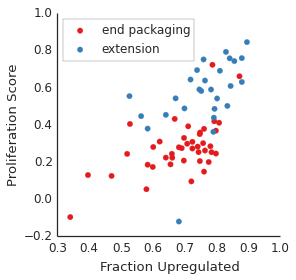

In [28]:
fig, ax = subplots(figsize=(4,4))
series_scatter(dx_rna.frac, pcna_corr.ix[ti(cc == 'end packaging')],
               ax=ax, color=colors[0], ann=None, alpha=1, s=30)
series_scatter(dx_rna.frac, pcna_corr.ix[ti(cc == 'extension')],
               ax=ax, color=colors[1], ann=None, alpha=1, s=30)
ax.set_xlabel('Fraction Upregulated')
ax.set_ylabel('Proliferation Score')
ax.legend(['end packaging','extension'], loc='upper left', frameon=True)
prettify_ax(ax)

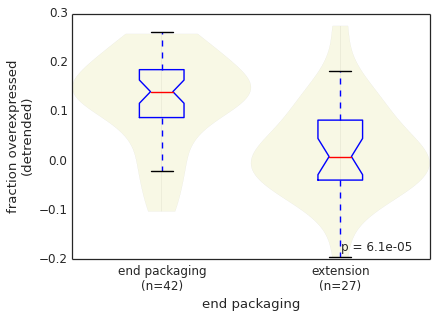

In [29]:
violin_plot_pandas(cc, f_win)